In [1]:
import pandas as pd
import re
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from tqdm import tqdm

from collections import Counter

from sklearn.metrics import cohen_kappa_score

In [17]:
posts = pd.read_json('FraudLink.json')

posts['Words in Text'] = posts["Text"].apply(lambda x: len(x.split(" ")))
posts['Characters in Text'] = posts["Text"].apply(lambda x: len(x))
posts['Word Lengths'] = posts["Text"].apply(lambda x: [len(word) for word in x.split(" ")])
posts['Capital Letters'] =  posts["Text"].apply(lambda x: sum(1 for c in x if c.isupper()))
posts['Hashtags'] =  posts["Text"].apply(lambda x: sum(1 for c in x if c == '#'))
posts.insert(7, 'Comments Collected', posts['Comments Text'].apply(lambda x: len(x)))

sentence_lengths = []
nlp=spacy.load('en_core_web_sm')
for post in tqdm(posts["Text"]):
    doc = nlp(post)
    sents = list(doc.sents)
    sentence_lengths.append(len(sents))
posts['Sentences in Text'] = sentence_lengths

sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [sentiment_analyzer.polarity_scores(post)["compound"] for post in posts["Text"]]
posts['Sentiment Score'] = sentiment_scores

def media_type(x):
    if 'Article' in x:
        return 'Article'
    else:
        return x
posts['Media Type Simple'] =  posts["Media Type"].apply(lambda x: media_type(x))

100%|██████████| 8336/8336 [02:53<00:00, 48.16it/s]


# Manually Labeled Data EDA

In [20]:
mis = posts[(posts['Is Hand Labeled'] == 1) & (posts['Multiclass Label'] == 'misinformation')]
cou = posts[(posts['Is Hand Labeled'] == 1) & (posts['Multiclass Label'] == 'counter-misinformation')]
neu = posts[(posts['Is Hand Labeled'] == 1) & (posts['Multiclass Label'] == 'non-misinformation')]

print('number of manually labeled posts:', len(posts[(posts['Is Hand Labeled'] == 1)]))
print('percentage of manually labeled posts:', len(posts[(posts['Is Hand Labeled'] == 1)]) / len(posts) * 100)
print('misinformation', len(mis) / len(posts[(posts['Is Hand Labeled'] == 1)]) * 100)
print('counter-misinformation', len(cou) / len(posts[(posts['Is Hand Labeled'] == 1)]) * 100)
print('non-misinformation', len(neu) / len(posts[(posts['Is Hand Labeled'] == 1)]) * 100)

number of manually labeled posts: 982
percentage of manually labeled posts: 11.780230326295586
misinformation 36.456211812627295
counter-misinformation 26.782077393075355
non-misinformation 36.76171079429735


In [9]:
manual = pd.read_json('FraudLink_manually_labeled.json')
print("Cohen's kappa score: ", cohen_kappa_score(manual['Label 1'], manual['Label 2']))

Cohen's kappa score:  0.8552433285189838


In [10]:
# Number of words per post: 

print('t-test mis and cou',ttest_ind(mis["Text"].apply(lambda x: len(x.split(" "))), cou["Text"].apply(lambda x: len(x.split(" ")))))
print('t-test mis and neu',ttest_ind(mis["Text"].apply(lambda x: len(x.split(" "))), neu["Text"].apply(lambda x: len(x.split(" ")))))
print('t-test cou and neu',ttest_ind(cou["Text"].apply(lambda x: len(x.split(" "))), neu["Text"].apply(lambda x: len(x.split(" ")))))
print('')
print('Average words per post for misinformation posts: ', mis['Words in Text'].mean())
print('Average words per post for counter-misinformation posts: ', cou['Words in Text'].mean())
print('Average words per post for neutral posts: ', neu['Words in Text'].mean())

t-test mis and cou Ttest_indResult(statistic=-0.45580530248774037, pvalue=0.6486898472161904)
t-test mis and neu Ttest_indResult(statistic=0.2535470799190561, pvalue=0.7999181688394547)
t-test cou and neu Ttest_indResult(statistic=0.757390180183832, pvalue=0.44910295764222974)

Average words per post for misinformation posts:  110.00837988826815
Average words per post for counter-misinformation posts:  114.70342205323193
Average words per post for neutral posts:  107.5235457063712


In [11]:
# Word lengths:

mis_wl = [item for sublist in list(mis['Word Lengths']) for item in sublist]
cou_wl = [item for sublist in list(cou['Word Lengths']) for item in sublist]
neu_wl = [item for sublist in list(neu['Word Lengths']) for item in sublist]

print('t-test mis and cou',ttest_ind(mis_wl, cou_wl))
print('t-test mis and neu',ttest_ind(mis_wl, neu_wl))
print('t-test cou and neu',ttest_ind(cou_wl, neu_wl))
print('')
print('Average length of words for misinformation posts: ', pd.Series(mis_wl).mean())
print('Average length of words for counter-misinformation posts: ', pd.Series(cou_wl).mean())
print('Average length of words for neutral posts: ', pd.Series(neu_wl).mean())

t-test mis and cou Ttest_indResult(statistic=-10.123457316805345, pvalue=4.5182370362409e-24)
t-test mis and neu Ttest_indResult(statistic=-14.124829751157115, pvalue=3.036049575616913e-45)
t-test cou and neu Ttest_indResult(statistic=-4.468325966082324, pvalue=7.89592894110163e-06)

Average length of words for misinformation posts:  5.133128507223929
Average length of words for counter-misinformation posts:  5.414592103954653
Average length of words for neutral posts:  5.565488458367684


In [12]:
# Word lengths:

mis_wl = [item for sublist in list(mis['Word Lengths']) for item in sublist]
cou_wl = [item for sublist in list(cou['Word Lengths']) for item in sublist]
neu_wl = [item for sublist in list(neu['Word Lengths']) for item in sublist]

print('t-test mis and cou',ttest_ind(mis_wl, cou_wl))
print('t-test mis and neu',ttest_ind(mis_wl, neu_wl))
print('t-test cou and neu',ttest_ind(cou_wl, neu_wl))
print('')
print('Average length of words for misinformation posts: ', pd.Series(mis_wl).mean())
print('Average length of words for counter-misinformation posts: ', pd.Series(cou_wl).mean())
print('Average length of words for neutral posts: ', pd.Series(neu_wl).mean())

t-test mis and cou Ttest_indResult(statistic=-10.123457316805345, pvalue=4.5182370362409e-24)
t-test mis and neu Ttest_indResult(statistic=-14.124829751157115, pvalue=3.036049575616913e-45)
t-test cou and neu Ttest_indResult(statistic=-4.468325966082324, pvalue=7.89592894110163e-06)

Average length of words for misinformation posts:  5.133128507223929
Average length of words for counter-misinformation posts:  5.414592103954653
Average length of words for neutral posts:  5.565488458367684


In [25]:
# Number of sentences

print('t-test mis and cou',ttest_ind(mis['Sentences in Text'], cou['Sentences in Text']))
print('t-test mis and neu',ttest_ind(mis['Sentences in Text'], neu['Sentences in Text']))
print('t-test cou and neu',ttest_ind(cou['Sentences in Text'], neu['Sentences in Text']))
print('')
print('Average number of sentences in misinformation posts: ', mis['Sentences in Text'].mean())
print('Average number of sentences in counter-misinformation posts: ', cou['Sentences in Text'].mean())
print('Average number of sentences in neutral posts: ', neu['Sentences in Text'].mean())

t-test mis and cou Ttest_indResult(statistic=0.7689147980421933, pvalue=0.4422371659786497)
t-test mis and neu Ttest_indResult(statistic=0.9997935897909604, pvalue=0.3177476979086668)
t-test cou and neu Ttest_indResult(statistic=0.2061741886194612, pvalue=0.8367223148437442)

Average number of sentences in misinformation posts:  6.569832402234637
Average number of sentences in counter-misinformation posts:  6.136882129277566
Average number of sentences in neutral posts:  6.033240997229917


In [29]:
# Number of characters

print('t-test mis and cou',ttest_ind(mis['Characters in Text'], cou['Characters in Text']))
print('t-test mis and neu',ttest_ind(mis['Characters in Text'], neu['Characters in Text']))
print('t-test cou and neu',ttest_ind(cou['Characters in Text'], neu['Characters in Text']))
print('')
print('Average Characters in Text in misinformation posts: ', mis['Characters in Text'].mean())
print('Average Characters in Text in counter-misinformation posts: ', cou['Characters in Text'].mean())
print('Average Characters in Text in neutral posts: ', neu['Characters in Text'].mean())

t-test mis and cou Ttest_indResult(statistic=-1.0033241006811624, pvalue=0.3160965557516662)
t-test mis and neu Ttest_indResult(statistic=-0.5355007011105647, pvalue=0.5924697281208283)
t-test cou and neu Ttest_indResult(statistic=0.5036151339970522, pvalue=0.6147101648584532)

Average Characters in Text in misinformation posts:  673.695530726257
Average Characters in Text in counter-misinformation posts:  734.7756653992395
Average Characters in Text in neutral posts:  704.9445983379501


In [28]:
# Capital letters per character

mis_cap_sen = mis[mis['Characters in Text'] != 0]['Capital Letters'] / mis[mis['Characters in Text'] != 0]['Characters in Text']
cou_cap_sen = cou[cou['Characters in Text'] != 0]['Capital Letters'] / cou[cou['Characters in Text'] != 0]['Characters in Text']
neu_cap_sen = neu[neu['Characters in Text'] != 0]['Capital Letters'] / neu[neu['Characters in Text'] != 0]['Characters in Text']


print('t-test mis and cou',ttest_ind(mis_cap_sen, cou_cap_sen))
print('t-test mis and neu',ttest_ind(mis_cap_sen, neu_cap_sen))
print('t-test cou and neu',ttest_ind(cou_cap_sen, neu_cap_sen))
print('')
print('Average number of capital letters per character in misinformation posts: ', mis_cap_sen.mean())
print('Average number of capital letters per character in counter-misinformation posts: ', cou_cap_sen.mean())
print('Average number of capital letters per character in neutral posts: ', neu_cap_sen.mean())

t-test mis and cou Ttest_indResult(statistic=4.374871924777352, pvalue=1.4257331060951403e-05)
t-test mis and neu Ttest_indResult(statistic=2.5409733664207734, pvalue=0.011264084492718228)
t-test cou and neu Ttest_indResult(statistic=-2.8802646038900193, pvalue=0.00411021028569204)

Average number of capital letters per character in misinformation posts:  0.06535139198883269
Average number of capital letters per character in counter-misinformation posts:  0.039536435230361495
Average number of capital letters per character in neutral posts:  0.0508008643910197


In [27]:
# Words per sentence

mis_words_sen = mis[mis['Sentences in Text'] != 0]['Words in Text'] / mis[mis['Sentences in Text'] != 0]['Sentences in Text']
cou_words_sen = cou[cou['Sentences in Text'] != 0]['Words in Text'] / cou[cou['Sentences in Text'] != 0]['Sentences in Text']
neu_words_sen = neu[neu['Sentences in Text'] != 0]['Words in Text'] / neu[neu['Sentences in Text'] != 0]['Sentences in Text']

print('t-test mis and cou',ttest_ind(mis_words_sen, cou_words_sen))
print('t-test mis and neu',ttest_ind(mis_words_sen, neu_words_sen))
print('t-test cou and neu',ttest_ind(cou_words_sen, neu_words_sen))
print('')
print('Average number of words per sentence in misinformation posts: ', mis_words_sen.mean())
print('Average number of words per sentence in counter-misinformation posts: ', cou_words_sen.mean())
print('Average number of words per sentence in neutral posts: ', neu_words_sen.mean())

t-test mis and cou Ttest_indResult(statistic=-2.398396790827559, pvalue=0.016761994470579376)
t-test mis and neu Ttest_indResult(statistic=-1.9209290130242698, pvalue=0.05513689658207003)
t-test cou and neu Ttest_indResult(statistic=0.825910547946837, pvalue=0.40917150795628776)

Average number of words per sentence in misinformation posts:  16.69127883515811
Average number of words per sentence in counter-misinformation posts:  18.811547512182443
Average number of words per sentence in neutral posts:  18.194716299092523


In [13]:
# Number of comments

print('t-test mis and cou',ttest_ind(mis['Comments'], cou['Comments']))
print('t-test mis and neu',ttest_ind(mis['Comments'], neu['Comments']))
print('t-test cou and neu',ttest_ind(cou['Comments'], neu['Comments']))
print('')
print('Average number of comments misinformation posts: ', mis['Comments'].mean())
print('Average number of comments counter-misinformation posts: ', cou['Comments'].mean())
print('Average number of comments neutral posts: ', neu['Comments'].mean())

t-test mis and cou Ttest_indResult(statistic=-1.5984415593956036, pvalue=0.11045503368232032)
t-test mis and neu Ttest_indResult(statistic=-1.7893195290592256, pvalue=0.07398534220590122)
t-test cou and neu Ttest_indResult(statistic=-0.43728908911353187, pvalue=0.6620534908648927)

Average number of comments misinformation posts:  9.865921787709498
Average number of comments counter-misinformation posts:  13.269961977186313
Average number of comments neutral posts:  14.56786703601108


In [14]:
# Number of likes

print('t-test mis and cou',ttest_ind(mis['Likes'], cou['Likes']))
print('t-test mis and neu',ttest_ind(mis['Likes'], neu['Likes']))
print('t-test cou and neu',ttest_ind(cou['Likes'], neu['Likes']))
print('')
print('Average number of likes misinformation posts: ', mis['Likes'].mean())
print('Average number of likes counter-misinformation posts: ', cou['Likes'].mean())
print('Average number of likes neutral posts: ', neu['Likes'].mean())

t-test mis and cou Ttest_indResult(statistic=-0.6440682283949871, pvalue=0.5197697642691296)
t-test mis and neu Ttest_indResult(statistic=-2.8681610271340214, pvalue=0.004249936951992829)
t-test cou and neu Ttest_indResult(statistic=-2.298354299600461, pvalue=0.021872436154799436)

Average number of likes misinformation posts:  32.62849162011173
Average number of likes counter-misinformation posts:  37.2851711026616
Average number of likes neutral posts:  84.82271468144044


In [15]:
# Number of reposts

print('t-test mis and cou',ttest_ind(mis['Reposts'], cou['Reposts']))
print('t-test mis and neu',ttest_ind(mis['Reposts'], neu['Reposts']))
print('t-test cou and neu',ttest_ind(cou['Reposts'], neu['Reposts']))
print('')
print('Average number of reposts misinformation posts: ', mis['Reposts'].mean())
print('Average number of reposts counter-misinformation posts: ', cou['Reposts'].mean())
print('Average number of reposts neutral posts: ', neu['Reposts'].mean())

t-test mis and cou Ttest_indResult(statistic=-0.4053282143174686, pvalue=0.6853763195541217)
t-test mis and neu Ttest_indResult(statistic=-2.3344548305604236, pvalue=0.01984712932899889)
t-test cou and neu Ttest_indResult(statistic=-1.9215552798371223, pvalue=0.05511836170745501)

Average number of reposts misinformation posts:  2.430167597765363
Average number of reposts counter-misinformation posts:  2.67680608365019
Average number of reposts neutral posts:  6.041551246537396


In [21]:
# Average sentiment score

print('t-test mis and cou',ttest_ind(mis['Sentiment Score'], cou['Sentiment Score']))
print('t-test mis and neu',ttest_ind(mis['Sentiment Score'], neu['Sentiment Score']))
print('t-test cou and neu',ttest_ind(cou['Sentiment Score'], neu['Sentiment Score']))
print('')
print('Average sentiment score misinformation posts: ', mis['Sentiment Score'].mean())
print('Average sentiment score counter-misinformation posts: ', cou['Sentiment Score'].mean())
print('Average sentiment score neutral posts: ', neu['Sentiment Score'].mean())

t-test mis and cou Ttest_indResult(statistic=6.259701033460553, pvalue=7.209520638980189e-10)
t-test mis and neu Ttest_indResult(statistic=-2.932194451561946, pvalue=0.003472974785510635)
t-test cou and neu Ttest_indResult(statistic=-8.93583464527182, pvalue=4.55607637945374e-18)

Average sentiment score misinformation posts:  0.16383324022346368
Average sentiment score counter-misinformation posts:  -0.1645060836501901
Average sentiment score neutral posts:  0.30115650969529084


In [22]:
# Number of capital letters

print('t-test mis and cou',ttest_ind(mis['Capital Letters'], cou['Capital Letters']))
print('t-test mis and neu',ttest_ind(mis['Capital Letters'], neu['Capital Letters']))
print('t-test cou and neu',ttest_ind(cou['Capital Letters'], neu['Capital Letters']))
print('')
print('Average number of capital letters in misinformation posts: ', mis['Capital Letters'].mean())
print('Average number of capital letters in counter-misinformation posts: ', cou['Capital Letters'].mean())
print('Average number of capital letters in neutral posts: ', neu['Capital Letters'].mean())

t-test mis and cou Ttest_indResult(statistic=1.8947986392752278, pvalue=0.058584829633620016)
t-test mis and neu Ttest_indResult(statistic=0.4637656244050726, pvalue=0.6429564311610484)
t-test cou and neu Ttest_indResult(statistic=-1.4332341816245298, pvalue=0.1522933631545429)

Average number of capital letters in misinformation posts:  42.175977653631286
Average number of capital letters in counter-misinformation posts:  26.193916349809886
Average number of capital letters in neutral posts:  37.64819944598338


In [23]:
# Number of hashtags

print('t-test mis and cou',ttest_ind(mis['Hashtags'], cou['Hashtags']))
print('t-test mis and neu',ttest_ind(mis['Hashtags'], neu['Hashtags']))
print('t-test cou and neu',ttest_ind(cou['Hashtags'], neu['Hashtags']))
print('')
print('Average number of Hashtags in misinformation posts: ', mis['Hashtags'].mean())
print('Average number of Hashtags in counter-misinformation posts: ', cou['Hashtags'].mean())
print('Average number of Hashtags in neutral posts: ', neu['Hashtags'].mean())

t-test mis and cou Ttest_indResult(statistic=3.301160595824181, pvalue=0.0010182220508516502)
t-test mis and neu Ttest_indResult(statistic=-1.6459888741516029, pvalue=0.10020428581086056)
t-test cou and neu Ttest_indResult(statistic=-3.764861706947099, pvalue=0.00018243627324587023)

Average number of Hashtags in misinformation posts:  6.055865921787709
Average number of Hashtags in counter-misinformation posts:  4.015209125475285
Average number of Hashtags in neutral posts:  7.479224376731302


100%|██████████| 358/358 [00:08<00:00, 43.71it/s]


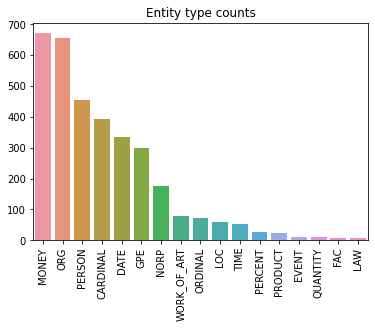

In [30]:
# Entity types for misinformation

entity_counts = Counter()
for post in tqdm(mis["Text"]):
    doc = nlp(post)
    for ent in doc.ents:
        entity_counts.update([ent.label_])
entity_counts_sorted = entity_counts.most_common()
sns.barplot(x=[ent for ent, cnt in entity_counts_sorted], y=[cnt for ent, cnt in entity_counts_sorted]).set(title="Entity type counts")
plt.xticks(rotation=90)
plt.show()

100%|██████████| 263/263 [00:06<00:00, 42.70it/s]


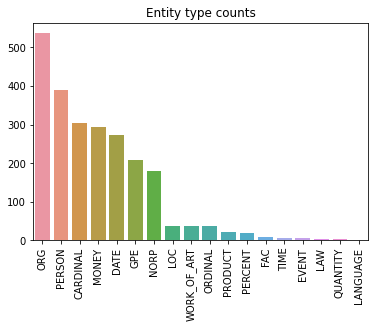

In [31]:
# Entity types for counter-misinformation

entity_counts = Counter()
for post in tqdm(cou["Text"]):
    doc = nlp(post)
    for ent in doc.ents:
        entity_counts.update([ent.label_])
entity_counts_sorted = entity_counts.most_common()
sns.barplot(x=[ent for ent, cnt in entity_counts_sorted], y=[cnt for ent, cnt in entity_counts_sorted]).set(title="Entity type counts")
plt.xticks(rotation=90)
plt.show()

100%|██████████| 361/361 [00:08<00:00, 44.05it/s]


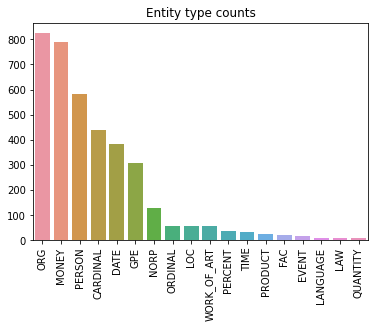

In [32]:
# Entity types for non-misinformation

entity_counts = Counter()
for post in tqdm(neu["Text"]):
    doc = nlp(post)
    for ent in doc.ents:
        entity_counts.update([ent.label_])
entity_counts_sorted = entity_counts.most_common()
sns.barplot(x=[ent for ent, cnt in entity_counts_sorted], y=[cnt for ent, cnt in entity_counts_sorted]).set(title="Entity type counts")
plt.xticks(rotation=90)
plt.show()

# Complete Dataset EDA

## Overall

In [33]:
# overall stats

print("number of posts: ", len(posts))
print("unique users: ", len(pd.unique(posts['Name'])))
print("number of comments collected: ", sum(posts['Comments Collected']))
print("percentage of comments collected: ", posts['Comments Collected'].sum()/posts['Comments'].sum())
vocab = set()
for words in posts["Text"].apply(lambda x: set(x.split(" "))):
    vocab.update(words)
print("Vocab size (before text cleaning): ", len(vocab))

number of posts:  8336
unique users:  5382
number of comments collected:  13728
percentage of comments collected:  0.27705348133198787
Vocab size (before text cleaning):  125277


In [35]:
# class breakdown

print('misinformation', len(posts[posts['Multiclass Label'] == 'misinformation'])/len(posts)*100, '%')
print('counter-misinformation', len(posts[posts['Multiclass Label'] == 'counter-misinformation'])/len(posts)*100, '%')
print('non-misinformation', len(posts[posts['Multiclass Label'] == 'non-misinformation'])/len(posts)*100, '%')

misinformation 24.556142034548945 %
counter-misinformation 13.855566218809981 %
non-misinformation 61.588291746641076 %


In [43]:
# features and text info distributions

numeric_columns = [
    'Likes', 
    'Comments', 
    'Comments Collected', 
    'Reposts', 
    'Words in Text',
    'Characters in Text', 
    'Sentences in Text',
    'Sentiment Score']

stats = {
    'column': [],
    'mean': [],
    'median':[],
    '90th percentile': [],
    'minimum': [],
    'maximum': []
}

for col in numeric_columns:
    stats['column'].append(col)
    stats['mean'].append(posts[col].mean())
    stats['median'].append(posts[col].median())
    stats['90th percentile'].append(posts[col].quantile(0.9))
    stats['minimum'].append(posts[col].min())
    stats['maximum'].append(posts[col].max())

pd.DataFrame(stats)


,column,mean,median,90th percentile,minimum,maximum
0,Likes,35.792946,8.0000,66.0000,0.0000,32038.0000
1,Comments,5.944098,1.0000,12.5000,0.0000,1214.0000
2,Comments Collected,1.646833,1.0000,5.0000,0.0000,11.0000
3,Reposts,2.037788,0.0000,4.0000,0.0000,1192.0000
4,Words in Text,96.967250,53.0000,261.0000,1.0000,578.0000
5,Characters in Text,638.820657,371.0000,1672.5000,8.0000,2992.0000
6,Sentences in Text,5.535629,3.0000,13.0000,1.0000,109.0000
7,Sentiment Score,0.274053,0.3818,0.9612,-0.9991,0.9997


[Text(0.5, 1.0, 'Number of words per post')]

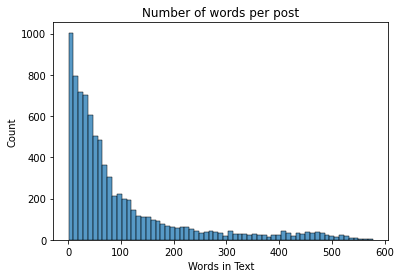

In [44]:
# word counts

sns.histplot(posts['Words in Text']).set(title="Number of words per post")

(0.0, 50.0)

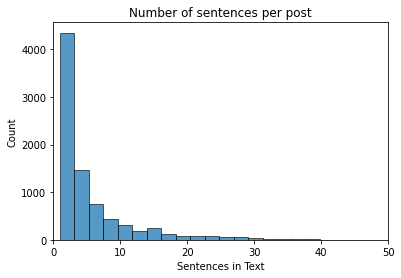

In [45]:
# sentence counts

sns.histplot(posts['Sentences in Text'], bins=50).set(title="Number of sentences per post")
plt.xlim(0, 50)

(0.0, 30.0)

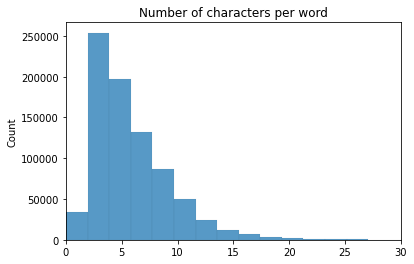

In [46]:
# word length distribution

word_lengths = []
for lens_per_post in posts["Text"].apply(lambda x: [len(word) for word in x.split(" ")]):
    word_lengths.extend(lens_per_post)
sns.histplot(word_lengths, bins=1000).set(title="Number of characters per word")
plt.xlim(0, 30)

-0.891375


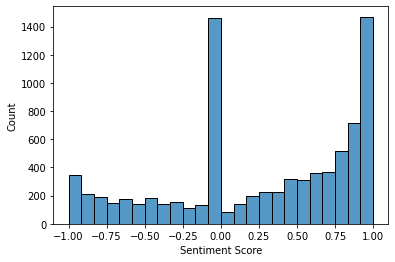

In [47]:
# basic sentiment analysis

sns.histplot(posts['Sentiment Score'])
print(posts['Sentiment Score'].quantile(0.05))

(0.0, 30.0)

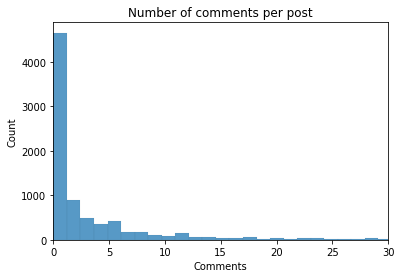

In [48]:
# comments collected per post

sns.histplot(posts['Comments'], bins = 1000).set(title="Number of comments per post")
plt.xlim(0, 30)

(0.0, 200.0)

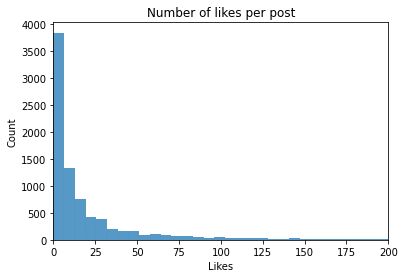

In [49]:
# likes

sns.histplot(posts['Likes'], bins=5000).set(title="Number of likes per post")
plt.xlim(0, 200)

(0.0, 15.0)

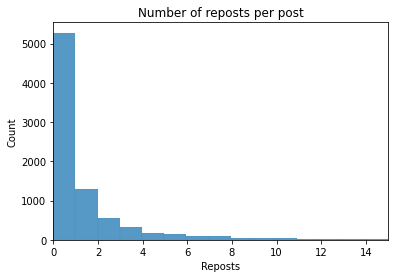

In [50]:
# reposts

sns.histplot(posts['Reposts'], bins=1200).set(title="Number of reposts per post")
plt.xlim(0, 15)

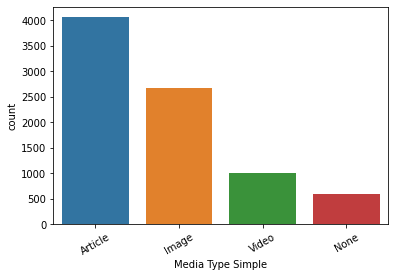

In [56]:
# media types

sns.countplot(posts, x="Media Type Simple", order = posts['Media Type Simple'].value_counts().index)
plt.xticks(rotation=30)
plt.show()

In [58]:
# media type distribution

posts['Media Type Simple'].value_counts()/len(posts)*100

Article    48.800384
Image      32.053743
Video      12.044146
None        7.101727
Name: Media Type Simple, dtype: float64

100%|██████████| 8336/8336 [02:50<00:00, 48.99it/s]


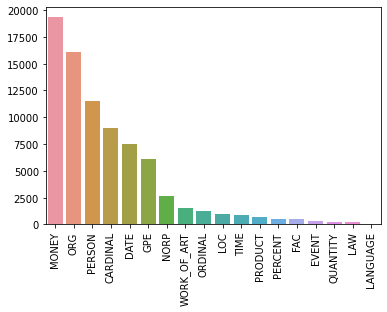

In [59]:
# counts of overall entity types

entity_counts = Counter()
for post in tqdm(posts["Text"]):
    doc = nlp(post)
    for ent in doc.ents:
        entity_counts.update([ent.label_])
entity_counts_sorted = entity_counts.most_common()
sns.barplot(x=[ent for ent, cnt in entity_counts_sorted], y=[cnt for ent, cnt in entity_counts_sorted])
plt.xticks(rotation=90)
plt.show()

## By Category

In [60]:
covid = [
    '#plandemic',
    'ivermectin', 
    'untested vaccine', 
    'chinese virus', 
    '#ChineseVirus', 
    '#ChinaVirus', 
    '#antivaccine',
    '#CCPvirus', 
    '5g causes covid',
    '#WuhanVirus', 
    '#antivaxxer',
    'antivaxxer', 
    '#scamdemic', 
    '#novaccinemandates',
    'Wuhan Virus'
    ]

conspiracy = [
    '#stolenelection', 
    'rapture', 
    'stolen election',
    'paranormal',  
    '#antichrist',
    'chemtrails', 
    'geoengineering', 
    '#weathercontrol', 
    '#rapture',
    '#mindcontrol', 
    'aerokinesis',
    '#climatecontrol', 
    'antichrist', 
    '#flatearth', 
    '#paranormal', 
    '#deepstate', 
    '#ufo', 
    '#geoengineering',
    'atmokinesis', 
    '#chemtrails']

covid_posts = posts[posts['Query'].isin(covid)]
conspiracy_posts = posts[posts['Query'].isin(conspiracy)]

all = sorted(covid).copy()
all.extend(sorted(conspiracy))

In [61]:
# covid posts

print('number of covid posts: ', len(covid_posts))
print('number of covid queries: ', len(covid))

print('misinformation, ', len(covid_posts[covid_posts['Multiclass Label'] == 'misinformation']) / len(covid_posts) * 100, '%')
print('counter-misinformation, ', len(covid_posts[covid_posts['Multiclass Label'] == 'counter-misinformation']) / len(covid_posts) * 100, '%')
print('non-misinformation, ', len(covid_posts[covid_posts['Multiclass Label'] == 'non-misinformation']) / len(covid_posts) * 100, '%')

number of covid posts:  2485
number of covid queries:  15
misinformation,  17.022132796780685 %
counter-misinformation,  25.794768611670023 %
non-misinformation,  57.183098591549296 %


In [62]:
# conspiracy posts

print('number of conspiracy posts: ', len(conspiracy_posts))
print('number of conspiracy queries: ', len(conspiracy))

print(len(conspiracy_posts[conspiracy_posts['Multiclass Label'] == 'misinformation']) / len(conspiracy_posts) * 100)
print(len(conspiracy_posts[conspiracy_posts['Multiclass Label'] == 'counter-misinformation']) / len(conspiracy_posts) * 100)
print(len(conspiracy_posts[conspiracy_posts['Multiclass Label'] == 'non-misinformation']) / len(conspiracy_posts) * 100)

number of conspiracy posts:  5851
number of conspiracy queries:  20
27.75593915569988
8.784823107161168
63.45923773713895


In [63]:
for query in all:
    print(query)
    print('points: ', len(posts[posts['Query'] == query]))
    print('mis: ', len(posts[(posts['Query'] == query) & (posts['Multiclass Label'] == 'misinformation')]) / len(posts[posts['Query'] == query]) * 100)
    print('counter: ', len(posts[(posts['Query'] == query) & (posts['Multiclass Label'] == 'counter-misinformation')]) / len(posts[posts['Query'] == query]) * 100)
    print('non: ', len(posts[(posts['Query'] == query) & (posts['Multiclass Label'] == 'non-misinformation')]) / len(posts[posts['Query'] == query]) * 100)
    print('--------')  

#CCPvirus
points:  135
mis:  60.0
counter:  9.62962962962963
non:  30.37037037037037
--------
#ChinaVirus
points:  28
mis:  25.0
counter:  10.714285714285714
non:  64.28571428571429
--------
#ChineseVirus
points:  24
mis:  37.5
counter:  8.333333333333332
non:  54.166666666666664
--------
#WuhanVirus
points:  102
mis:  12.745098039215685
counter:  8.823529411764707
non:  78.43137254901961
--------
#antivaccine
points:  73
mis:  2.73972602739726
counter:  28.767123287671232
non:  68.4931506849315
--------
#antivaxxer
points:  93
mis:  15.053763440860216
counter:  35.483870967741936
non:  49.46236559139785
--------
#novaccinemandates
points:  119
mis:  13.445378151260504
counter:  17.647058823529413
non:  68.90756302521008
--------
#plandemic
points:  252
mis:  15.873015873015872
counter:  19.444444444444446
non:  64.68253968253968
--------
#scamdemic
points:  79
mis:  29.11392405063291
counter:  10.126582278481013
non:  60.75949367088608
--------
5g causes covid
points:  344
mis:  2.325